In [6]:
%matplotlib inline

#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Graph ui setting
sns.set_style("dark")

#reading data 
titanic_data=pd.read_csv('C:/Users/Amit/Desktop/titanic_data.csv')

In [7]:
titanic_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [8]:
titanic_data.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#creating dataset without unwanted columns
titanic_data_cleaned=titanic_data.drop(['name','ticket','fare','cabin','embarked','boat','body','home.dest'],axis=1)
titanic_data_cleaned.head()

,pclass,survived,sex,age,sibsp,parch
0,1.0,1.0,female,29.0000,0.0,0.0
1,1.0,1.0,male,0.9167,1.0,2.0
2,1.0,0.0,female,2.0000,1.0,2.0
3,1.0,0.0,male,30.0000,1.0,2.0
4,1.0,0.0,female,25.0000,1.0,2.0


In [20]:
titanic_data_cleaned.tail()

,pclass,survived,sex,age,sibsp,parch
1305,3.0,0.0,female,NaN,1.0,0.0
1306,3.0,0.0,male,26.5,0.0,0.0
1307,3.0,0.0,male,27.0,0.0,0.0
1308,3.0,0.0,male,29.0,0.0,0.0
1309,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#fixing missing or data format issues
titanic_data_cleaned.isnull().sum()

pclass        1
survived      1
sex           1
age         264
sibsp         1
parch         1
dtype: int64

In [22]:
#reviewing some missing age data
missing_age_bool=pd.isnull(titanic_data_cleaned['age'])
titanic_data_cleaned[missing_age_bool].head()

,pclass,survived,sex,age,sibsp,parch
15,1.0,0.0,male,NaN,0.0,0.0
37,1.0,1.0,male,NaN,0.0,0.0
40,1.0,0.0,male,NaN,0.0,0.0
46,1.0,0.0,male,NaN,0.0,0.0
59,1.0,1.0,female,NaN,0.0,0.0


In [23]:
titanic_data_cleaned[missing_age_bool].tail()

,pclass,survived,sex,age,sibsp,parch
1297,3.0,0.0,male,NaN,0.0,0.0
1302,3.0,0.0,male,NaN,0.0,0.0
1303,3.0,0.0,male,NaN,0.0,0.0
1305,3.0,0.0,female,NaN,1.0,0.0
1309,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# Taking a look at the datatypes
titanic_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 6 columns):
pclass      1309 non-null float64
survived    1309 non-null float64
sex         1309 non-null object
age         1046 non-null float64
sibsp       1309 non-null float64
parch       1309 non-null float64
dtypes: float64(5), object(1)
memory usage: 56.3+ KB


In [50]:
# Determine number of males and females with missing age values
missing_age_female = titanic_data_cleaned[missing_age_bool]['sex'] == 'female'
missing_age_male = titanic_data_cleaned[missing_age_bool]['sex'] == 'male'

mafs=missing_age_female.sum()
mams=missing_age_male.sum()
print ('number of females age missing:',mafs)
print ('number of males age missing:',mams)


number of females age missing: 78
number of males age missing: 185


In [47]:
#statistics
titanic_data_cleaned.describe()

,pclass,survived,age,sibsp,parch
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027
std,0.837836,0.486055,14.413500,1.041658,0.865560
min,1.000000,0.000000,0.166700,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000


In [49]:
# Age min at 0.42 looks a bit weird so give a closer look
titanic_data_cleaned[titanic_data_cleaned['age'] < 1]

,pclass,survived,sex,age,sibsp,parch
1,1.0,1.0,male,0.9167,1.0,2.0
359,2.0,1.0,male,0.8333,0.0,2.0
427,2.0,1.0,male,0.6667,1.0,1.0
548,2.0,1.0,male,0.8333,1.0,1.0
590,2.0,1.0,female,0.9167,1.0,2.0
611,3.0,1.0,male,0.8333,0.0,1.0
657,3.0,1.0,female,0.7500,2.0,1.0
658,3.0,1.0,female,0.7500,2.0,1.0
747,3.0,0.0,male,0.3333,0.0,2.0
763,3.0,1.0,female,0.1667,1.0,2.0


In [54]:
youngest_to_survive=titanic_data_cleaned[titanic_data_cleaned['survived']==True]['age'].min()
youngest_to_die=titanic_data_cleaned[titanic_data_cleaned['survived']==False]['age'].min()
oldest_to_survive=titanic_data_cleaned[titanic_data_cleaned['survived']==True]['age'].max()
oldest_to_die=titanic_data_cleaned[titanic_data_cleaned['survived']==False]['age'].max()

yts=youngest_to_survive
ytd=youngest_to_die
ots=oldest_to_survive
otd=oldest_to_die

print (' Youngest to survive:',yts,'\n Youngest to die:',ytd,'\n Oldest to survive',ots,'\n Oldest to die',otd)


 Youngest to survive: 0.1667 
 Youngest to die: 0.3333 
 Oldest to survive 80.0 
 Oldest to die 74.0


In [55]:
#Were social-economic standing a factor in survival rate?
#Returns survival rate/percentage of sex and class

def survival_rate(pclass, sex):
    """
    Args:
        pclass: class value 1,2 or 3
        sex: male or female
    Returns:
        survival rate as percentage.
    """
    grouped_by_total = titanic_data_cleaned.groupby(['pclass', 'sex']).size()[pclass,sex].astype('float')
    grouped_by_survived_sex = \
        titanic_data_cleaned.groupby(['pclass','survived','sex']).size()[pclass,1,sex].astype('float')
    survived_sex_pct = (grouped_by_survived_sex / grouped_by_total * 100).round(2)

    return survived_sex_pct

overall data:

pclass  survived  sex   
1.0     0.0       female      5
                  male      118
        1.0       female    139
                  male       61
2.0     0.0       female     12
                  male      146
        1.0       female     94
                  male       25
3.0     0.0       female    110
                  male      418
        1.0       female    106
                  male       75
dtype: int64
*******************************
Class 1: Female survival rate: 96.53
Class 1: Male survival rate: 34.08
*******************************
Class 1: Female survival rate: 88.68
Class 1: Male survival rate: 14.62
*******************************
Class 1: Female survival rate: 49.07
Class 1: Male survival rate: 15.21
*******************************


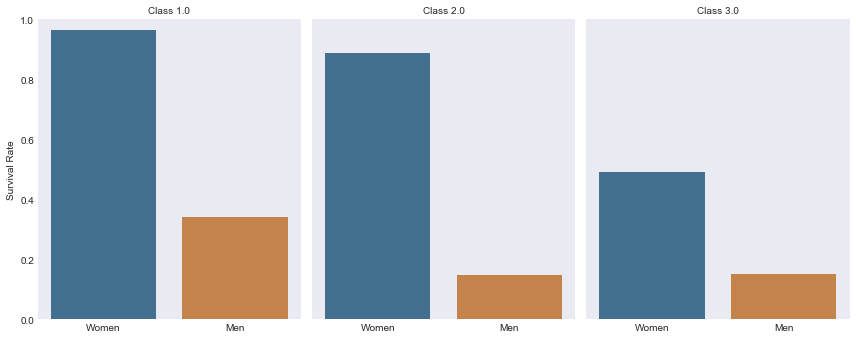

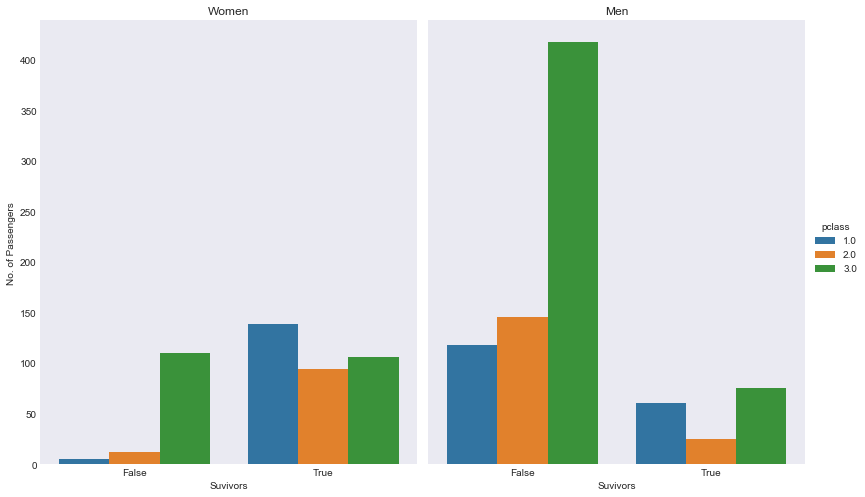

In [87]:
#actual number grouped by class,survival and sex
groupedby_class_survived_size = titanic_data_cleaned.groupby(['pclass','survived','sex']).size()

#printing grouped class,survival and sex
print ('overall data:\n')
print (groupedby_class_survived_size)
print ('*******************************')

#calculating survival rate
sf1=survival_rate(1,'female')
sm1=survival_rate(1,'male')
sf2=survival_rate(2,'female')
sm2=survival_rate(2,'male')
sf3=survival_rate(3,'female')
sm3=survival_rate(3,'male')


#printing data in percentage form
print ('Class 1: Female survival rate:',sf1)
print ('Class 1: Male survival rate:',sm1)
print ('*******************************')
print ('Class 1: Female survival rate:',sf2)
print ('Class 1: Male survival rate:',sm2)
print ('*******************************')
print ('Class 1: Female survival rate:',sf3)
print ('Class 1: Male survival rate:',sm3)
print ('*******************************')

#graph-group(class,survival and sex)
g = sns.factorplot(x="sex", y="survived", col="pclass", data=titanic_data_cleaned,
                   saturation=.5, kind="bar", ci=None, size=5, aspect=.8)

#Fixing the labels
(g.set_axis_labels('', 'Survival Rate')
     .set_xticklabels(["Women", "Men"])
     .set_titles("Class {col_name}")
     .set(ylim=(0, 1))
     .despine(left=True, bottom=True))

#graph with actual count
g = sns.factorplot('survived', col='sex', hue='pclass', data=titanic_data_cleaned, kind='count', size=7, aspect=.8)

#Fixing labels of second graph
(g.set_axis_labels('Suvivors', 'No. of Passengers')
    .set_xticklabels(["False", "True"])
    .set_titles('{col_name}')
)

titles = ['Women', 'Men']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

number of females age missing: 78
number of males age missing: 185
Total no. of survivors: 427 
Total no. of non-survivors: 619 
Mean age of survivors: 28.918228103 
Mean age of non-survivors: 30.5453688207


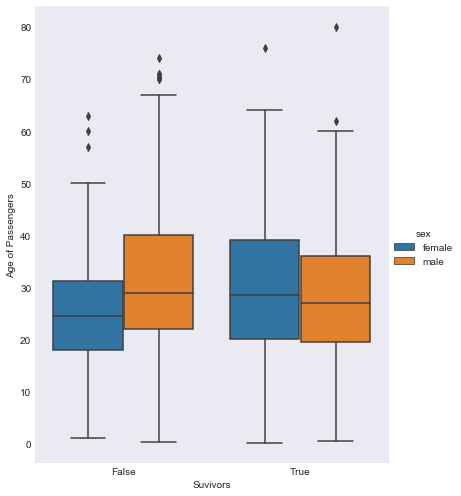

In [94]:
#Did age, regardless of sex and class, determine your chances of survival?

#Let us first identify and get rid of records with missing Age
print ('number of females age missing:',mafs)
print ('number of males age missing:',mams)

# Droping the NaN values. 
titanic_data_age_cleaned = titanic_data_cleaned.dropna()

#Finding total count of survivors and those who didn't
number_survived = titanic_data_age_cleaned[titanic_data_age_cleaned['survived'] == True]['survived'].count()
number_died = titanic_data_age_cleaned[titanic_data_age_cleaned['survived'] == False]['survived'].count()

#finding average
mean_age_survived = titanic_data_age_cleaned[titanic_data_age_cleaned['survived'] == True]['age'].mean()
mean_age_died = titanic_data_age_cleaned[titanic_data_age_cleaned['survived'] == False]['age'].mean()

#displaying total
print ('Total no. of survivors:',number_survived,
       '\nTotal no. of non-survivors:',number_died,
       '\nMean age of survivors:',mean_age_survived,
       '\nMean age of non-survivors:',mean_age_died)

# Graph - Age of passengers across sex of those who survived
g = sns.factorplot(x="survived", y="age", hue='sex', data=titanic_data_age_cleaned, kind="box", size=7, aspect=.8)

# Fix up the labels
(g.set_axis_labels('Suvivors', 'Age of Passengers')
    .set_xticklabels(["False", "True"])
)


c:\users\amit\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Category  survived
Child     0.0          73
          1.0          81
Man       0.0         472
          1.0         104
Woman     0.0          74
          1.0         242
dtype: int64


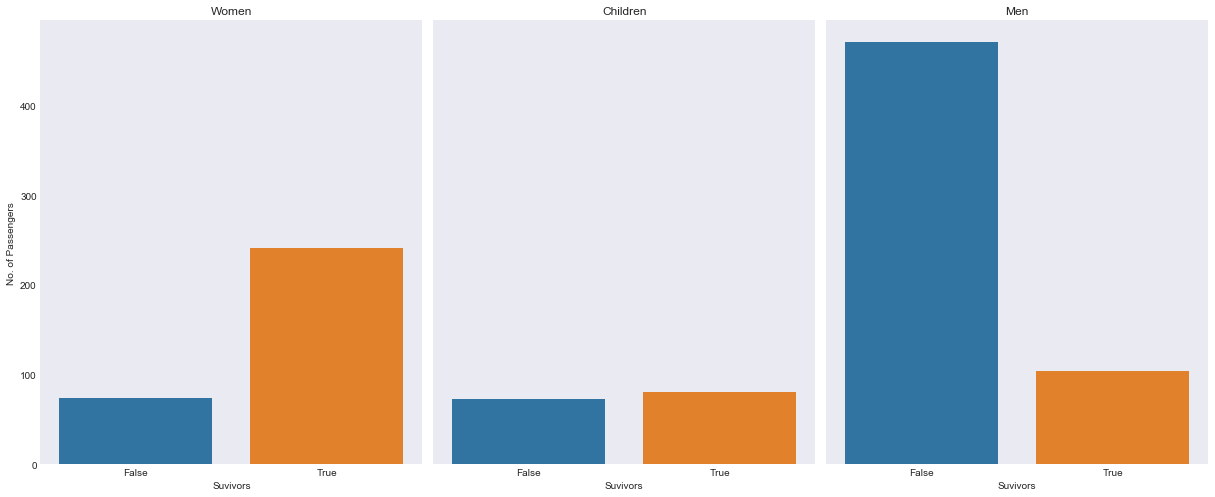

In [100]:
#Did women and children have preference to lifeboats and therefore survival (assuming there was no shortage of lifeboats)?
# <18years considered child

titanic_data_age_cleaned.loc[
    ( (titanic_data_age_cleaned['sex'] == 'female') &
    (titanic_data_age_cleaned['age'] >= 18) ),
    'Category'] = 'Woman'

titanic_data_age_cleaned.loc[
    ( (titanic_data_age_cleaned['sex'] == 'male') &
    (titanic_data_age_cleaned['age'] >= 18) ),
    'Category'] = 'Man'

titanic_data_age_cleaned.loc[
    (titanic_data_age_cleaned['age'] < 18),
    'Category'] = 'Child'

# totals grouped by Men, Women and Children, and by survival
print (titanic_data_age_cleaned.groupby(['Category','survived']).size())

# Graph - Compare survival count between Men, Women and Children
g = sns.factorplot('survived', col='Category', data=titanic_data_age_cleaned, kind='count', size=7, aspect=.8)

# Fix up the labels
(g.set_axis_labels('Suvivors', 'No. of Passengers')
    .set_xticklabels(['False', 'True'])
)

titles = ['Women', 'Children', 'Men']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)